In [40]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
df = pd.read_csv('ams22.csv')
df.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,HgYmin,HgXmax,HgYmax,Intersection,Included_Center,Intersection_Area,Hg_Area,Distance,Ground_Truth,GT
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,176.115577,425.699604,203.980340,Center_left,1,844.925198,881.508223,136.120892,1,GBC
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,176.050999,425.668627,203.878841,Center_left,1,848.952861,892.193796,136.317231,1,GBC
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,175.932056,425.627609,203.722820,Center_left,1,837.705837,890.243298,136.384041,1,GBC
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,177.653896,423.709709,202.787083,Center_left,1,613.789372,763.579688,136.939795,1,GBC
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,177.582060,423.771116,202.885134,Center_left,1,611.643926,767.067283,136.847188,1,GBC


In [42]:
len(df)

18520

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18520 entries, 0 to 18519
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Frame              18520 non-null  int64  
 1   N_Person           18520 non-null  int64  
 2   Xcenter            18520 non-null  float64
 3   Ycenter            18520 non-null  float64
 4   PerXmin            18520 non-null  float64
 5   PerYmin            18520 non-null  float64
 6   PerXmax            18520 non-null  float64
 7   PerYmax            18520 non-null  float64
 8   N_Handgun          18520 non-null  int64  
 9   HgXcenter          18520 non-null  float64
 10  HgYcenter          18520 non-null  float64
 11  HgXmin             18520 non-null  float64
 12  HgYmin             18520 non-null  float64
 13  HgXmax             18520 non-null  float64
 14  HgYmax             18520 non-null  float64
 15  Intersection       18520 non-null  object 
 16  Included_Center    185

In [44]:
df.nunique()

Frame                 1933
N_Person                 5
Xcenter              14265
Ycenter              14246
PerXmin              14273
PerYmin              14270
PerXmax              14273
PerYmax              14250
N_Handgun                5
HgXcenter             7292
HgYcenter             7290
HgXmin                7294
HgYmin                7294
HgXmax                7294
HgYmax                7293
Intersection             9
Included_Center          2
Intersection_Area     8481
Hg_Area               7294
Distance             18520
Ground_Truth             3
GT                       3
dtype: int64

In [45]:
df['Ground_Truth'].value_counts()

0    15050
2     1838
1     1632
Name: Ground_Truth, dtype: int64

In [46]:
df2 = pd.get_dummies(df,columns=['Intersection'])
df2.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,GT,Intersection_Center_left,Intersection_Center_right,Intersection_Down_center,Intersection_Down_left,Intersection_Inside,Intersection_No_intersection,Intersection_Up_center,Intersection_Up_left,Intersection_Up_right
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,GBC,1,0,0,0,0,0,0,0,0
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,GBC,1,0,0,0,0,0,0,0,0
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,GBC,1,0,0,0,0,0,0,0,0
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,GBC,1,0,0,0,0,0,0,0,0
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,GBC,1,0,0,0,0,0,0,0,0


In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18520 entries, 0 to 18519
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18520 non-null  int64  
 1   N_Person                      18520 non-null  int64  
 2   Xcenter                       18520 non-null  float64
 3   Ycenter                       18520 non-null  float64
 4   PerXmin                       18520 non-null  float64
 5   PerYmin                       18520 non-null  float64
 6   PerXmax                       18520 non-null  float64
 7   PerYmax                       18520 non-null  float64
 8   N_Handgun                     18520 non-null  int64  
 9   HgXcenter                     18520 non-null  float64
 10  HgYcenter                     18520 non-null  float64
 11  HgXmin                        18520 non-null  float64
 12  HgYmin                        18520 non-null  float64
 13  H

# Random Forest 
## Todos los predictores

In [48]:
pred = dict(zip(df2.Ground_Truth.unique(),df2.GT.unique()))
print(pred)

{1: 'GBC', 0: 'MLP', 2: 'LR'}


In [49]:
print(df2['Ground_Truth'].value_counts())

0    15050
2     1838
1     1632
Name: Ground_Truth, dtype: int64


In [30]:
df3 = df2.drop(columns=["GT"])

In [50]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18520 entries, 0 to 18519
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18520 non-null  int64  
 1   N_Person                      18520 non-null  int64  
 2   Xcenter                       18520 non-null  float64
 3   Ycenter                       18520 non-null  float64
 4   PerXmin                       18520 non-null  float64
 5   PerYmin                       18520 non-null  float64
 6   PerXmax                       18520 non-null  float64
 7   PerYmax                       18520 non-null  float64
 8   N_Handgun                     18520 non-null  int64  
 9   HgXcenter                     18520 non-null  float64
 10  HgYcenter                     18520 non-null  float64
 11  HgXmin                        18520 non-null  float64
 12  HgYmin                        18520 non-null  float64
 13  H

In [51]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df3, test_size=0.2, random_state=123)
X_train, y_train = train_df.drop(columns=["Ground_Truth"], axis=1), train_df["Ground_Truth"]
X_test, y_test = test_df.drop(columns=["Ground_Truth"], axis=1), test_df["Ground_Truth"]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14816, 28) (14816,)
(3704, 28) (3704,)


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

clf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=0)
y_pred = clf.fit(X_train, y_train).predict(X_test)
scores = pd.DataFrame(cross_validate(clf, X_train, y_train, cv=10, return_train_score=True))
print("mean_train = ", scores['train_score'].mean())
print("mean_test = ", scores['test_score'].mean())
scores

mean_train =  0.8871564391409226
mean_test =  0.8858652695729351


,fit_time,score_time,test_score,train_score
0,0.097677,0.006106,0.880567,0.883606
1,0.096714,0.001995,0.890013,0.889531
2,0.099764,0.002991,0.890013,0.883831
3,0.098741,0.002988,0.888664,0.881281
4,0.101730,0.002990,0.893387,0.885556
5,0.100734,0.002990,0.892713,0.887356
6,0.098707,0.002992,0.869683,0.883315
7,0.101730,0.002991,0.888589,0.894263
8,0.100730,0.002993,0.875084,0.891639
9,0.102725,0.002993,0.889939,0.891189


                         feature  importance       std
27         Intersection_Up_right    0.000000  0.000000
25        Intersection_Up_center    0.000000  0.000000
24  Intersection_No_intersection    0.000000  0.000000
22        Intersection_Down_left    0.000000  0.000000
21      Intersection_Down_center    0.000000  0.000000
26          Intersection_Up_left    0.000000  0.000000
8                      N_Handgun    0.000204  0.000611
15               Included_Center    0.001948  0.003911
19      Intersection_Center_left    0.003462  0.007374
13                        HgXmax    0.003490  0.005022
20     Intersection_Center_right    0.007883  0.023649
9                      HgXcenter    0.007907  0.012647
23           Intersection_Inside    0.011396  0.029735
1                       N_Person    0.014635  0.027166
11                        HgXmin    0.015225  0.033849
17                       Hg_Area    0.028377  0.033805
12                        HgYmin    0.030517  0.078307
3         

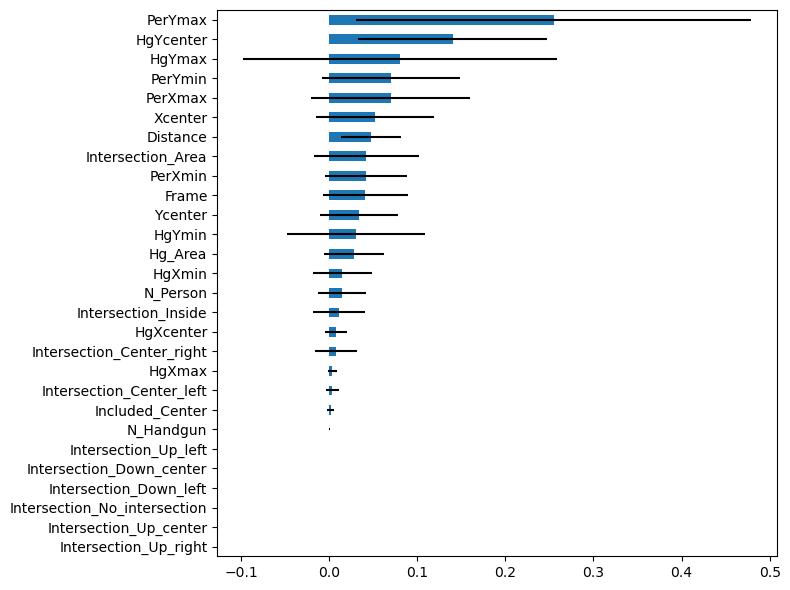

In [54]:
clf.fit(X_train.values, y_train.values)
predictions=clf.predict(X_test.values)
#Le agrego .values para solucionar el problema:
#C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
#https://stackoverflow.com/questions/69326639/sklearn-warning-valid-feature-names-in-version-1-0

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

df = pd.DataFrame({'feature': X_train.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(figsize=(8,6),kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      3017
           1       0.95      0.17      0.29       322
           2       0.90      0.70      0.79       365

    accuracy                           0.89      3704
   macro avg       0.91      0.62      0.67      3704
weighted avg       0.90      0.89      0.87      3704



In [27]:
# save the model to disk
filename = 'rfc_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 

# Redes Neuronales - Todos los predictores

In [63]:
X = df3.drop('Ground_Truth',axis='columns')
y = df3.Ground_Truth

In [64]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18520 entries, 0 to 18519
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18520 non-null  int64  
 1   N_Person                      18520 non-null  int64  
 2   Xcenter                       18520 non-null  float64
 3   Ycenter                       18520 non-null  float64
 4   PerXmin                       18520 non-null  float64
 5   PerYmin                       18520 non-null  float64
 6   PerXmax                       18520 non-null  float64
 7   PerYmax                       18520 non-null  float64
 8   N_Handgun                     18520 non-null  int64  
 9   HgXcenter                     18520 non-null  float64
 10  HgYcenter                     18520 non-null  float64
 11  HgXmin                        18520 non-null  float64
 12  HgYmin                        18520 non-null  float64
 13  H

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]
#X_scaled.shape

array([[-1.86281341, -1.00623539,  0.38752111, -1.05942061,  0.40863352,
        -0.80177466,  0.35069418, -1.43040435, -0.49663035,  0.64678533,
        -1.25923785,  0.69955197, -1.17776537,  0.59262317, -1.33602807,
         1.17636439, -0.05146461, -0.63056227, -0.69586814,  2.66819151,
        -0.28341547, -0.0180022 , -0.01039245, -0.53789818, -1.08384958,
        -0.11979096, -0.06159576, -0.14119531],
       [-1.86064242, -1.00623539,  0.38723536, -1.05882998,  0.40765129,
        -0.80008557,  0.35113979, -1.43315588, -0.49663035,  0.64519119,
        -1.26009215,  0.69655175, -1.17841666,  0.59242236, -1.33708736,
         1.17636439, -0.04905069, -0.62468311, -0.69443957,  2.66819151,
        -0.28341547, -0.0180022 , -0.01039245, -0.53789818, -1.08384958,
        -0.11979096, -0.06159576, -0.14119531],
       [-1.85847144, -1.00623539,  0.38785593, -1.06098485,  0.4091204 ,
        -0.80414007,  0.35085877, -1.42914023, -0.49663035,  0.64501271,
        -1.26150658,  0.6964

In [66]:
print(scaler.mean_)

[8.58048650e+02 8.79589633e-01 3.92806059e+02 3.82440691e+02
 3.05539236e+02 2.46107454e+02 4.80072882e+02 5.18773927e+02
 2.98218143e-01 3.10902093e+02 3.12445589e+02 2.87521764e+02
 2.92895493e+02 3.34282422e+02 3.31995685e+02 4.19492441e-01
 9.30794571e+02 2.02757651e+03 2.31759339e+02 1.23164147e-01
 7.43520518e-02 3.23974082e-04 1.07991361e-04 2.24406048e-01
 5.40172786e-01 1.41468683e-02 3.77969762e-03 1.95464363e-02]


In [67]:
print(scaler.scale_)

[4.60619751e+02 8.74139036e-01 2.12100424e+02 6.87713103e+01
 2.19849845e+02 1.11882718e+02 2.12574870e+02 3.91572907e+01
 6.00483121e-01 1.53033612e+02 9.71997711e+01 1.52301205e+02
 9.91538035e+01 1.54258535e+02 9.58178561e+01 4.93475970e-01
 1.66851299e+03 1.81753387e+03 1.37437601e+02 3.28625531e-01
 2.62342952e-01 1.79963642e-02 1.03913280e-02 4.17190572e-01
 4.98383534e-01 1.18096293e-01 6.13629490e-02 1.38435447e-01]


In [68]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10) #stratify hace que el ratio entre 0 y 1 se mantenga en la distri. entre el test(y). 

In [69]:
X_train.shape

(13890, 28)

In [70]:
y_train.value_counts()

0    11288
2     1378
1     1224
Name: Ground_Truth, dtype: int64

In [71]:
X_test.shape

(4630, 28)

In [72]:
y_test.value_counts()

0    3762
2     460
1     408
Name: Ground_Truth, dtype: int64

In [73]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(hidden_layer_sizes=(25,25,25,25), max_iter=500, alpha=0.0001, solver='adam',
                 random_state=0, tol=0.000000001)
y_pred = clf.fit(X_train, y_train).predict(X_test)
predictions_mlp=clf.predict_proba(X_test)
predictions_mlp

array([[1.97295681e-05, 8.37363259e-06, 9.99971897e-01],
       [9.94805726e-01, 4.35200302e-03, 8.42270706e-04],
       [9.99999840e-01, 7.62639260e-08, 8.39005723e-08],
       ...,
       [9.22407634e-01, 9.63235343e-10, 7.75923655e-02],
       [9.99999038e-01, 2.13088949e-09, 9.60330419e-07],
       [9.99554621e-01, 3.74152900e-04, 7.12256243e-05]])

In [74]:
predictions_mlp=clf.predict(X_test)
predictions_mlp

array([2, 0, 0, ..., 0, 0, 0], dtype=int64)

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_mlp))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3762
           1       0.87      0.80      0.83       408
           2       0.90      0.95      0.92       460

    accuracy                           0.96      4630
   macro avg       0.92      0.91      0.91      4630
weighted avg       0.96      0.96      0.96      4630



In [77]:
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

Score train =  0.9804895608351332
Score test =  0.9645788336933045


In [44]:
# save the model to disk
filename = 'mlp_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 